   ## P2M : Recommendation System For Baccalaureat Students

In [472]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [473]:
df = pd.read_csv("P2M.csv")
pd.set_option('display.max_columns', None)
del df['Horodateur']
del df['Est-ce tu as choisi les math comme option?']
df

,Quel est ton parcours académique ?,Combiens de livres as tu lu les 6 derniers mois?,Comment exprimes tu tes idées et tes émotions?,Combiens de pages as tu écrites?,As tu fait des tentatives de poésie?,Joues tu le scrable?,As tu visité un monument historique?,Lis tu des livres d'histoire?,Votre Réaction face à une nouvelle?,Combiens de journaux par semaine tu lis?,Dans le présent gouvernement: combien de ministres peux tu identifier?,Devant une décision:,Lors d'un discours:,Lors d'une discussion?,Est-ce tu veux te consacrer aux autres?,Est-ce que tu joues à l'echec?,"Dans ton travail, tu préfères:","Dans ton travail, tu préfères, une activité artistique","Dans ton travail, tu aimes créer, inventer …","En cas de stress, je garde la tête froide",Je repère facilement les petits défauts,Tu es du genre à répondre aux besoins des autres,Votre moyenne des sciences naturelles en 3eme annee secondaire,Je me sens à l'aise en travaillant en équipe,Je trouve du plaisir à travailler les mathématiques,"Ce qu'il t'attire le plus, les sciences fondamentales (math, physiques…).","Ce qu'il t'attire le plus, transmettre tes connaissances aux autres.","Ce qu'il t'attire le plus, travailler avec tes mains.","Ce qu'il t'attire le plus, utiliser des outils ou des instruments.","Ce qu'il t'attire le plus, mettre en application tes connaissances théoriques.","Ce qu'il t'attire le plus, réaliser des projets.","Pour toi, le travail en équipe, est une obligation","Ce qu'il t'attire le plus, faire preuve d'endurance.",Tu est du type qui aime travailler la terre.,Tu est du type qui aime s'occuper des animaux.
0,Lettres & langues,2 à 4,Réaction verbale,<5,>2,Non,Oui,>3,Admettre,<3,<5,Tu prends la décision tout seul indépendamment...,Tu sais séduire les autres,Tu participes et tu acceptes changer tes idées?,Pas du tout,Non,L'essentiel un travail peu fatiguant,Moyennement,Pas du tout,Moyennement,Moyennement,Oui parfaitement,<10,Pas du tout,Moyennement,Moyennement,Moyennement,Pas du tout,Pas du tout,Pas du tout,Moyennement,Moyennement,Beaucoup,Pas du tout,Moyennement
1,Lettres & langues,>4,Ecrire,>10,>2,Non,Oui,>3,Mettre en question,3 à 7,<5,"Discuter ton point de vue, puis décider",Tu n'aimes pas te dévoiler devant les autres,Tu participes et tu acceptes changer tes idées?,Un peu,Non,Un tarvail de bureau,Pas du tout,Pas du tout,Moyennement,Moyennement,Moyennement,10 à 15,Moyennement,Pas du tout,Pas du tout,Moyennement,Pas du tout,Pas du tout,Moyennement,Pas du tout,Moyennement,Beaucoup,Pas du tout,Moyennement
2,Lettres & langues,2 à 4,Réaction verbale,>10,1 à 2,Parfois,Oui,1 à 3,Mettre en question,>7,>5,"Discuter ton point de vue, puis décider",Tu sais séduire les autres,Tu participes et tu acceptes changer tes idées?,Oui souvent,Non,L'essentiel un travail peu fatiguant,Pas du tout,Pas du tout,Oui parfaitement,Oui parfaitement,Moyennement,<10,Pas du tout,Pas du tout,Pas du tout,Oui parfaitement,Pas du tout,Pas du tout,Pas du tout,Pas du tout,Pas du tout,Beaucoup,Pas du tout,Pas du tout
3,Lettres & langues,>4,Réaction verbale,>10,1 à 2,Non,Oui,>3,Mettre en question,<3,<5,"Discuter ton point de vue, puis décider",Tu t'exprimes mais timidement,Tu ne participes pas et tu préfères garder tes...,Un peu,Non,Un tarvail de bureau,Moyennement,Moyennement,Pas du tout,Oui parfaitement,Moyennement,<10,Pas du tout,Pas du tout,Pas du tout,Moyennement,Pas du tout,Pas du tout,Pas du tout,Pas du tout,Moyennement,Beaucoup,Moyennement,Moyennement
4,Lettres & langues,2 à 4,Réaction verbale,5 à 10,Non,Non,Oui,Non,Admettre,<3,<5,"Discuter ton point de vue, puis décider",Tu sais séduire les autres,Tu participes et tu acceptes changer tes idées?,Oui souvent,Non,Un tarvail de bureau,Beaucoup,Beaucoup,Pas du tout,Moyennement,Oui parfaitement,<10,Oui parfaitement,Pas du tout,Pas du tout,Oui parfaitement,Moyennement,Oui parfaitement,Pas du tout,Moyennement,Oui parfaitement,Moyennement,Moyennement,Beaucoup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Nominal Encoding

In [474]:
def catToNum(df,variable):
    classes = [1,0,2]
    RealClasses = list(df[variable].unique())
    RealClasses.sort()
    for i in range(3):
        df[variable] = np.where(df[variable]==RealClasses[i],classes[i],df[variable])

In [475]:
## Lettres & langues OU Sc. Humaines-----> 1
## Sc. Juridiques -----> 2
## Médias -----> 3
## Arts et métiers -----> 4
## Médicale -----> 5
## Gestion et sc. Économiques -----> 6
## Sc. Fondamentales -----> 7
## Agriculture & environnement -----> 8
## Etudes ingénieurs & architech OU Etudes techno-----> 9

In [476]:
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Lettres & langues',0,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Sc. Humaines',0,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Médias',2,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Sc. Juridiques',3,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Arts et métiers',4,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Médicale',5,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Gestion et sc. Économiques',6,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Sc. Fondamentales',7,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Agriculture & environnement',8,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Etudes techno',9,df['Quel est ton parcours académique ?'])
df['Quel est ton parcours académique ?'] = np.where(df['Quel est ton parcours académique ?'] == 'Etudes ingénieurs & architech',9,df['Quel est ton parcours académique ?'])

## Ordinal Encoding

In [477]:
## 'Combiens de livres as tu  lu les 6 derniers mois?' 
## <2 ----> 0
## 2 à 4 -----> 1
## >4 -----> 2
variable = 'Combiens de livres as tu  lu les 6 derniers mois?'
catToNum(df,variable)

In [478]:
##'Combiens de pages as tu écrites?'
##<5 ----> 0
##5 à 10 -----> 1
##>10 ----->2
catToNum(df,'Combiens de pages as tu écrites?')

In [479]:
## 'As tu fait des tentatives de poésie?'
## Non ----> 0
## 1 à 2 -----> 1
## >2 -----> 2
variable = 'As tu fait des tentatives de poésie?'
df[variable] = np.where(df[variable]=='Non','<2',df[variable])
catToNum(df,'As tu fait des tentatives de poésie?')

In [480]:
## 'Lis tu des livres d'histoire?'
## Non ----> 0
## 1 à 3 ----> 1
## >3 ----> 2
variable = "Lis tu  des livres d'histoire?"
df[variable] = np.where(df[variable]=='Non','<1',df[variable])
catToNum(df,"Lis tu  des livres d'histoire?")

In [481]:
def catToNum2(df,variable,l):
    ## Pas du tout -----> 0
    ## Moyennement ------> 1
    ## Oui Parfaitement ou Beaucoup------> 2
    classes = [0,1,2]
    RealClasses = ['Pas du tout', 'Moyennement', l]
    for i in range(3):
        df[variable] = np.where(df[variable]==RealClasses[i],classes[i],df[variable])

In [482]:
L2 = []
L1 = []
RealClasses = ['Pas du tout', 'Moyennement', 'Oui parfaitement']
for i in df.columns:
    aux = df[i].unique()
    if 'Pas du tout' in aux:
        
            if 'Beaucoup' in aux:
                L1.append(i)
            else:
                L2.append(i)
print(L1)

['Dans ton travail, tu préfères, une activité artistique', 'Dans ton travail, tu aimes créer, inventer …', "Ce qu'il t'attire le plus, faire preuve d'endurance.", 'Tu est du type qui aime travailler la terre.', "Tu est du type qui aime s'occuper des animaux."]


In [483]:
for variable in L1:
    catToNum2(df,variable,'Beaucoup')

In [484]:
for variable in L2:
    catToNum2(df,variable,'Oui parfaitement')

In [485]:
## 'Combiens de journaux par semaine tu lis?'
## <3 ----> 0
## 3 à 7 -----> 1
## >7 ------->2
variable = 'Combiens de journaux par semaine tu lis?'
catToNum(df,variable)

In [486]:
##Dans le présent gouvernement: combien de ministres peux tu identifier?
## <5 ----> 0
## >5 ----> 1
## Tous ----> 2
variable = "Dans le présent gouvernement: combien de ministres peux tu identifier?"
df[variable] = np.where(df[variable]=='Tous',2,df[variable])
df[variable] = np.where(df[variable]=='<5',0,df[variable])
df[variable] = np.where(df[variable]=='>5',1,df[variable])

In [487]:
## 'Votre moyenne des sciences naturelles en 3eme annee secondaire'
## <10 ----> 0
## 10 à 15 ----> 1
## >15 ----> 2
variable ='Votre moyenne des sciences naturelles en 3eme annee secondaire'
df[variable] = np.where(df[variable]=='>15',2,df[variable])
df[variable] = np.where(df[variable]=='<10',0,df[variable])
df[variable] = np.where(df[variable]=='10 à 15',1,df[variable])

In [488]:
##'Est-ce tu veux te consacrer aux autres?'
## Pas de tout ----> 0
## Un Peu ------> 1 
## Oui souvent ----> 2
variable = 'Est-ce tu veux te consacrer aux autres?'
df[variable] = np.where(df[variable]=='Un peu',1,df[variable])
df[variable] = np.where(df[variable]=='Oui souvent',2,df[variable])

## Handling Missing Values 

In [489]:
## Most fréquent values technique
for i in df.columns:
    df[i] = np.where(df[i].isnull(),df[i].value_counts().index[[df[i].value_counts().argmax()]][0],df[i])

## One Hot encoding for nominal variables

In [490]:
import category_encoders as ce
#Create object for one-hot encoding
L= ['As tu  visité un monument historique?',"Comment exprimes tu  tes idées et tes émotions?",'Joues tu le scrable?','Votre Réaction face à une nouvelle?',"Est-ce que  tu joues à l'echec?",'Devant une décision:',"Lors d'un discours:","Lors d'une discussion?",'Dans ton travail, tu préfères:']#'Est-ce tu as choisi les math comme option?']  
encoder=ce.OneHotEncoder(cols=L,handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(df)
data_encoded


,Quel est ton parcours académique ?,Combiens de livres as tu lu les 6 derniers mois?,Comment exprimes tu tes idées et tes émotions?_Réaction verbale,Comment exprimes tu tes idées et tes émotions?_Ecrire,Comment exprimes tu tes idées et tes émotions?_Réaction physique,Combiens de pages as tu écrites?,As tu fait des tentatives de poésie?,Joues tu le scrable?_Non,Joues tu le scrable?_Parfois,Joues tu le scrable?_Souvent,As tu visité un monument historique?_Oui,As tu visité un monument historique?_Non,Lis tu des livres d'histoire?,Votre Réaction face à une nouvelle?_Admettre,Votre Réaction face à une nouvelle?_Mettre en question,Votre Réaction face à une nouvelle?_Négliger,Combiens de journaux par semaine tu lis?,Dans le présent gouvernement: combien de ministres peux tu identifier?,Devant une décision:_Tu prends la décision tout seul indépendamment des autres,"Devant une décision:_Discuter ton point de vue, puis décider",Devant une décision:_Laisser les autres décider à ta place,Lors d'un discours:_Tu sais séduire les autres,Lors d'un discours:_Tu n'aimes pas te dévoiler devant les autres,Lors d'un discours:_Tu t'exprimes mais timidement,Lors d'une discussion?_Tu participes et tu acceptes changer tes idées?,Lors d'une discussion?_Tu ne participes pas et tu préfères garder tes idées à toi?,Lors d'une discussion?_Tu participes et tu tiens à tes idées?,Est-ce tu veux te consacrer aux autres?,Est-ce que tu joues à l'echec?_Non,Est-ce que tu joues à l'echec?_Rarement,Est-ce que tu joues à l'echec?_Oui souvent,"Dans ton travail, tu préfères:_L'essentiel un travail peu fatiguant","Dans ton travail, tu préfères:_Un tarvail de bureau","Dans ton travail, tu préfères:_Un travail actif","Dans ton travail, tu préfères, une activité artistique","Dans ton travail, tu aimes créer, inventer …","En cas de stress, je garde la tête froide",Je repère facilement les petits défauts,Tu es du genre à répondre aux besoins des autres,Votre moyenne des sciences naturelles en 3eme annee secondaire,Je me sens à l'aise en travaillant en équipe,Je trouve du plaisir à travailler les mathématiques,"Ce qu'il t'attire le plus, les sciences fondamentales (math, physiques…).","Ce qu'il t'attire le plus, transmettre tes connaissances aux autres.","Ce qu'il t'attire le plus, travailler avec tes mains.","Ce qu'il t'attire le plus, utiliser des outils ou des instruments.","Ce qu'il t'attire le plus, mettre en application tes connaissances théoriques.","Ce qu'il t'attire le plus, réaliser des projets.","Pour toi, le travail en équipe, est une obligation","Ce qu'il t'attire le plus, faire preuve d'endurance.",Tu est du type qui aime travailler la terre.,Tu est du type qui aime s'occuper des animaux.
0,0,1,1.0,0.0,0.0,0,2,1.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,1,1,2,0,0,1,1,1,0,0,0,1,1,2,0,1
1,0,2,0.0,1.0,0.0,2,2,1.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1,1,1,1,1,0,0,1,0,0,1,0,1,2,0,1
2,0,1,1.0,0.0,0.0,2,1,0.0,1.0,0.0,1.0,0.0,1,0.0,1.0,0.0,2,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,1.0,0.0,0.0,1.0,0.0,0.0,0,0,2,2,1,0,0,0,0,2,0,0,0,0,0,2,0,0
3,0,2,1.0,0.0,0.0,2,1,1.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0,2,1,0,0,0,0,1,0,0,0,0,1,2,1,1
4,0,1,1.0,0.0,0.0,1,0,1.0,0.0,0.0,1.0,0.0,0,1.0,0.0,0.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,1.0,0.0,0.0,0.0,1.0,0.0,2,2,0,1,2,0,2,0,0,2,1,2,0,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,7,0,0.0,0.0,1.0,0,0,1.0,0.0,0.0,1.0,0.0,0,0.0,0.0,1.0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,2,2,1,1,2,2,1,0,0,2,2,1,0,0,2
114,7,1,1.0,0.0,0.0,1,1,1.0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,0.0,1.0,0.0,0.0,0.0,1.0,0,1,2,2,1,2,

## Correlation Matrix

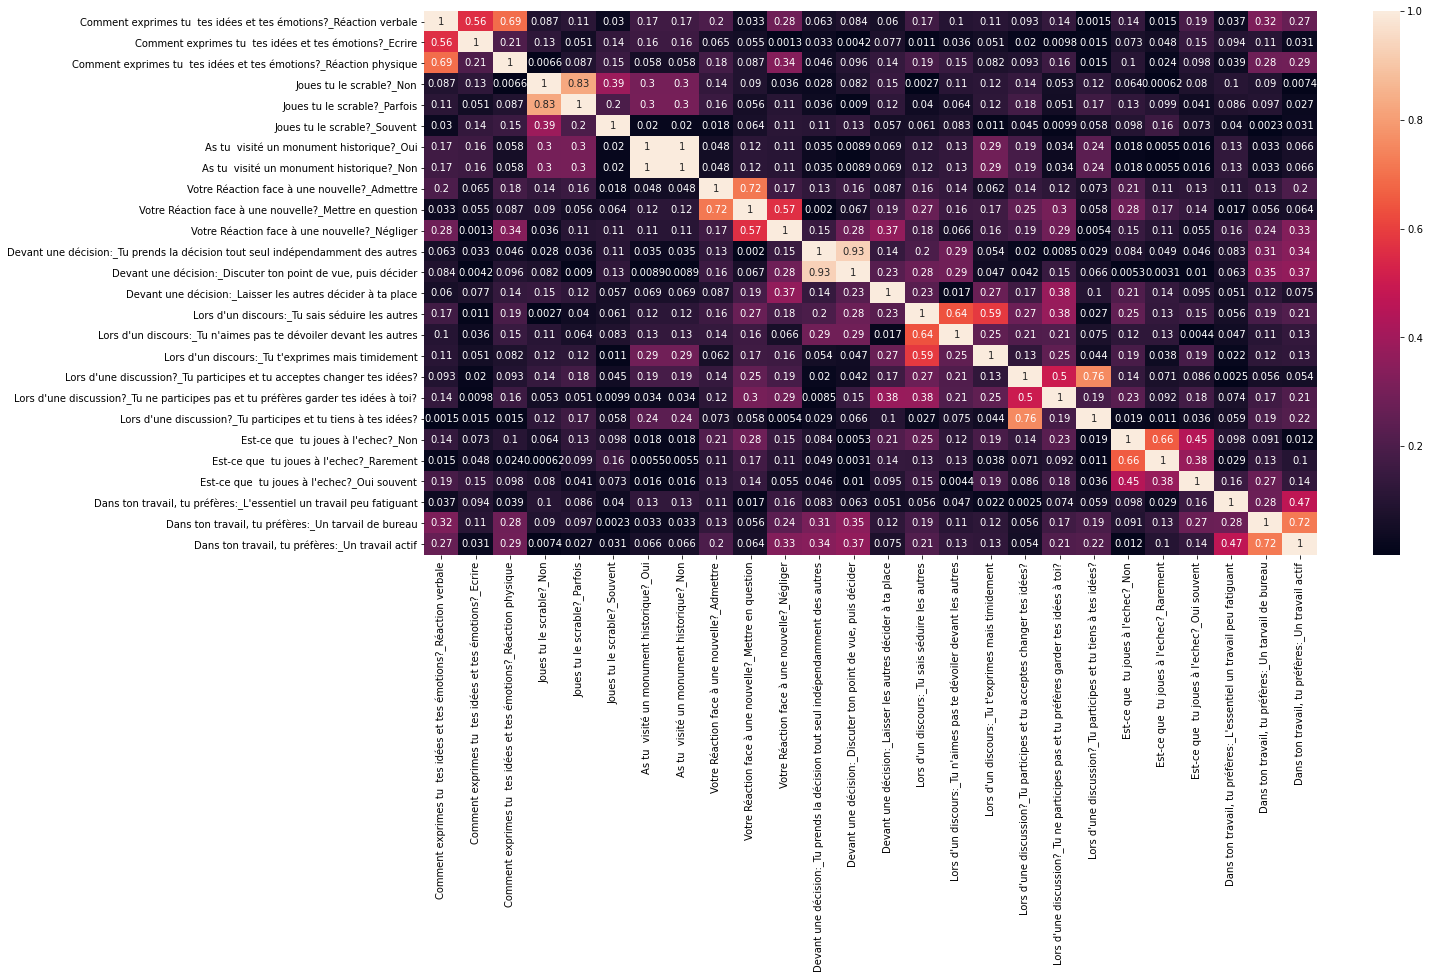

In [491]:
plt.figure(figsize=(20,10))
correlation_matrix=data_encoded.corr()
sns.heatmap(correlation_matrix.abs(), annot=True)

In [492]:
correlated_features=[]
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.74:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)


In [493]:
data_encoded.drop(correlated_features, axis='columns', inplace=True)
data_encoded.shape

(118, 48)

In [494]:
data_encoded

,Quel est ton parcours académique ?,Combiens de livres as tu lu les 6 derniers mois?,Comment exprimes tu tes idées et tes émotions?_Réaction verbale,Comment exprimes tu tes idées et tes émotions?_Ecrire,Comment exprimes tu tes idées et tes émotions?_Réaction physique,Combiens de pages as tu écrites?,As tu fait des tentatives de poésie?,Joues tu le scrable?_Non,Joues tu le scrable?_Souvent,As tu visité un monument historique?_Oui,Lis tu des livres d'histoire?,Votre Réaction face à une nouvelle?_Admettre,Votre Réaction face à une nouvelle?_Mettre en question,Votre Réaction face à une nouvelle?_Négliger,Combiens de journaux par semaine tu lis?,Dans le présent gouvernement: combien de ministres peux tu identifier?,Devant une décision:_Tu prends la décision tout seul indépendamment des autres,Devant une décision:_Laisser les autres décider à ta place,Lors d'un discours:_Tu sais séduire les autres,Lors d'un discours:_Tu n'aimes pas te dévoiler devant les autres,Lors d'un discours:_Tu t'exprimes mais timidement,Lors d'une discussion?_Tu participes et tu acceptes changer tes idées?,Lors d'une discussion?_Tu ne participes pas et tu préfères garder tes idées à toi?,Est-ce tu veux te consacrer aux autres?,Est-ce que tu joues à l'echec?_Non,Est-ce que tu joues à l'echec?_Rarement,Est-ce que tu joues à l'echec?_Oui souvent,"Dans ton travail, tu préfères:_L'essentiel un travail peu fatiguant","Dans ton travail, tu préfères:_Un tarvail de bureau","Dans ton travail, tu préfères:_Un travail actif","Dans ton travail, tu préfères, une activité artistique","Dans ton travail, tu aimes créer, inventer …","En cas de stress, je garde la tête froide",Je repère facilement les petits défauts,Tu es du genre à répondre aux besoins des autres,Votre moyenne des sciences naturelles en 3eme annee secondaire,Je me sens à l'aise en travaillant en équipe,Je trouve du plaisir à travailler les mathématiques,"Ce qu'il t'attire le plus, les sciences fondamentales (math, physiques…).","Ce qu'il t'attire le plus, transmettre tes connaissances aux autres.","Ce qu'il t'attire le plus, travailler avec tes mains.","Ce qu'il t'attire le plus, utiliser des outils ou des instruments.","Ce qu'il t'attire le plus, mettre en application tes connaissances théoriques.","Ce qu'il t'attire le plus, réaliser des projets.","Pour toi, le travail en équipe, est une obligation","Ce qu'il t'attire le plus, faire preuve d'endurance.",Tu est du type qui aime travailler la terre.,Tu est du type qui aime s'occuper des animaux.
0,0,1,1.0,0.0,0.0,0,2,1.0,0.0,1.0,2,1.0,0.0,0.0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,1,1,2,0,0,1,1,1,0,0,0,1,1,2,0,1
1,0,2,0.0,1.0,0.0,2,2,1.0,0.0,1.0,2,0.0,1.0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1,1,1,1,1,0,0,1,0,0,1,0,1,2,0,1
2,0,1,1.0,0.0,0.0,2,1,0.0,0.0,1.0,1,0.0,1.0,0.0,2,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,1.0,0.0,0.0,0,0,2,2,1,0,0,0,0,2,0,0,0,0,0,2,0,0
3,0,2,1.0,0.0,0.0,2,1,1.0,0.0,1.0,2,0.0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0,2,1,0,0,0,0,1,0,0,0,0,1,2,1,1
4,0,1,1.0,0.0,0.0,1,0,1.0,0.0,1.0,0,1.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,0.0,1.0,0.0,2,2,0,1,2,0,2,0,0,2,1,2,0,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,7,0,0.0,0.0,1.0,0,0,1.0,0.0,1.0,0,0.0,0.0,1.0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,2,2,1,1,2,2,1,0,0,2,2,1,0,0,2
114,7,1,1.0,0.0,0.0,1,1,1.0,0.0,1.0,1,0.0,1.0,0.0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0,0.0,1.0,0,1,2,2,1,2,2,2,2,2,0,0,2,2,2,0,0,2
115,7,0,1.0,0.0,0.0,0,0,1.0,0.0,0.0,0,0.0,1.0,0.0,0,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0,2,2,2,1,2,2,2,2,1,1,1,2,1,1,0,0,1
116,7,1,1.0,0.0,0.0,2,0,0.0,0.0,1.0,1,0.0,0.0,1.0,1,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2,0.0,0.0,1.0,0.0,0.0,1.0,0,1,2,2,2,1,2,2,2,1,0,0,2,1,1,1,0,2


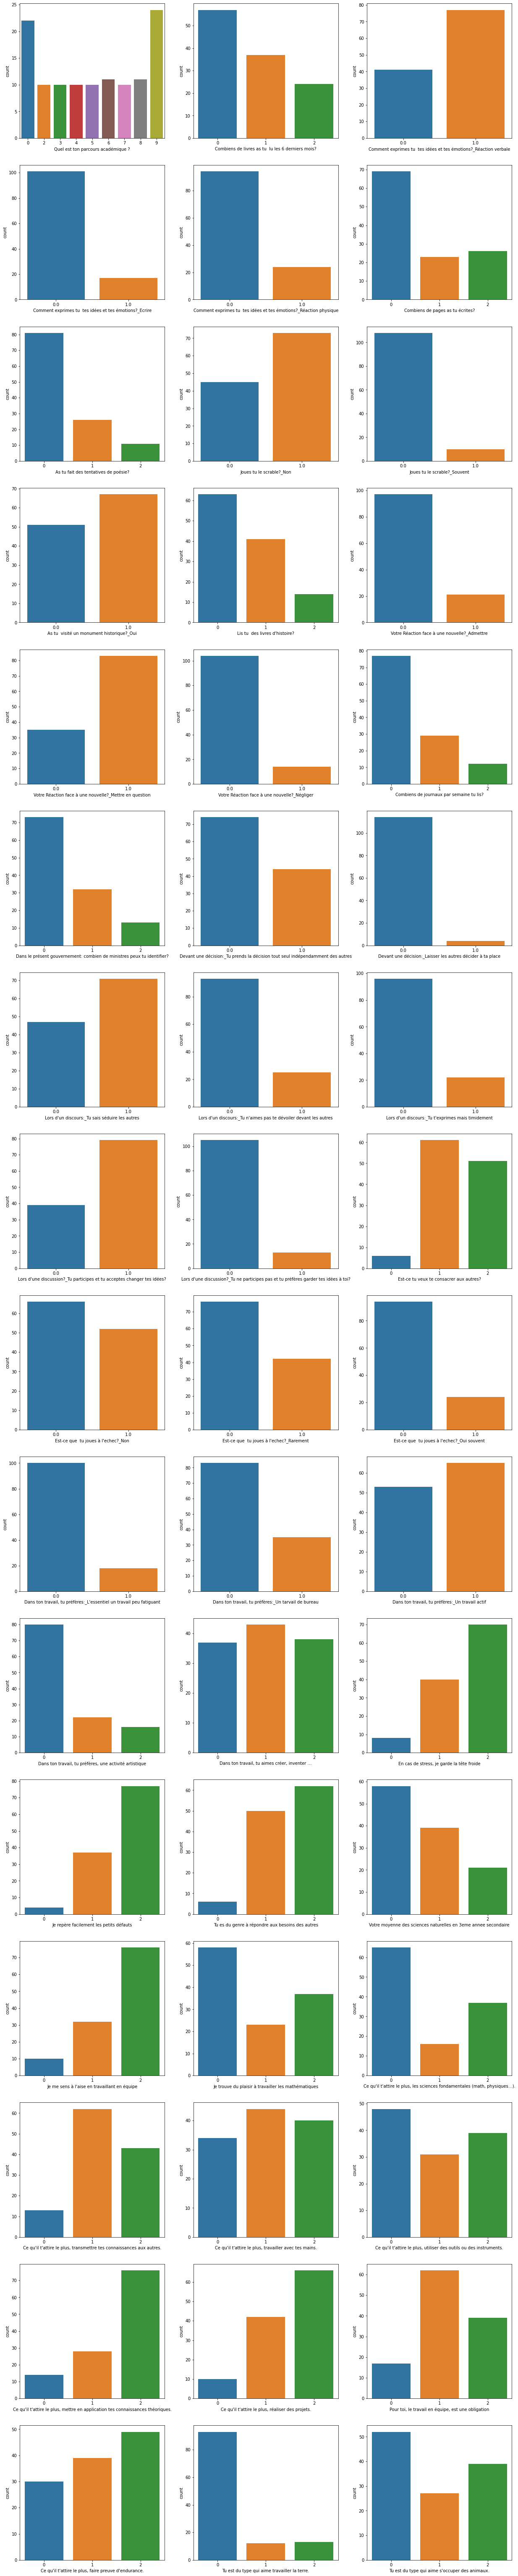

In [513]:
##fig, ax = plt.subplots(16,3)
num_plots = len(data_encoded.columns)
total_cols = 3
total_rows = num_plots//total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows))
for i, var in enumerate(data_encoded.columns):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data_encoded, ax=axs[row][pos])

## DataFrame To Array

In [496]:
X = data_encoded.iloc[:,1:].values
y = data_encoded.iloc[:,0].values
X=X.astype('int')
y=y.astype('int')

## Balancing Data 

In [497]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

## Features Selection 

#### Using Chi-Squared Features

In [498]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
def select_features(Xtrain, ytrain, Xtest,i):
    fs = SelectKBest(score_func=chi2, k=i)
    fs.fit(Xtrain, ytrain)
    Xtrain_fs = fs.transform(Xtrain)
    Xtest_fs = fs.transform(Xtest)
    return Xtrain_fs, Xtest_fs, fs

## KNN 

In [499]:
def KNN(Xtrain_fs,ytrain,Xtest_fs):
    k = int(len(Xtrain) ** (1/2))
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import classification_report
    from scipy.spatial import distance
    KNN = KNeighborsClassifier(n_neighbors=k, metric=distance.sqeuclidean)
    KNN.fit(Xtrain_fs,ytrain)
    ypred = KNN.predict(Xtest_fs)
    return ypred

## SVM

In [500]:
def SVM(Xtrain_fs,ytrain,Xtest_fs):
    from sklearn import svm
    clf = svm.SVC(kernel='linear') # Linear Kernel
    clf.fit(Xtrain_fs, ytrain)
    ypred = clf.predict(Xtest_fs)
    return ypred

## Multi-layer Perceptron (MLP)

In [501]:
def MLP(Xtrain_fs,ytrain,Xtest_fs):
    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50,), random_state=1)
    clf.fit(Xtrain_fs, ytrain)
    ypred = clf.predict(Xtest_fs)
    return ypred

## Logistic Regression

In [502]:
def LR(Xtrain_fs,ytrain,Xtest_fs):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    lr = LogisticRegression(random_state=1,max_iter=1000)
    lr.fit(Xtrain_fs, ytrain)
    ypred = lr.predict(Xtest_fs)
    return ypred

## Majority Decision  

In [503]:
def final_model(Xtrain_fs, ytrain, Xtest_fs):
    y1 = np.array(LR(Xtrain_fs,ytrain,Xtest_fs))
    y2 = np.array(SVM(Xtrain_fs,ytrain,Xtest_fs))
    y3 = np.array(MLP(Xtrain_fs,ytrain,Xtest_fs))
    
    ypred = np.zeros(y1.shape)
    ypred = np.where(y1==y2,y1,y3)
    ypred = np.where(ypred==y2,ypred,y3)
    ypred = np.where(ypred==y1,ypred,y3)
    
    return ypred

In [504]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
#kf = KFold(n_splits=10, random_state=2, shuffle=True) 
#rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=17)
m1,m2,m3,m4 = 0,0,0,0
i=0

score = pd.DataFrame(columns=['Fusion','MLP','SVM','LR'])

for i in range(100):
    Xtrain, Xtest,ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=i)
    Xtrain_fs, Xtest_fs, fs = select_features(Xtrain, ytrain, Xtest,40)
    
    ypredfusion=final_model(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredmlp=MLP(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredsvm=SVM(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredlr=LR(Xtrain_fs, ytrain, Xtest_fs)
    
    
    i+=1
    print('Iteration' + str(i))
    print('YTest ',ytest)
    print('YPred ',ypredfusion)
    print()
    score.loc[i-1] = [metrics.accuracy_score(ypredfusion, ytest),metrics.accuracy_score(ypredmlp, ytest),metrics.accuracy_score(ypredsvm, ytest),metrics.accuracy_score(ypredlr, ytest)]
    
#print(m1/i)
# MLP,KNN,LR

Iteration1
YTest  [7 6 9 5 4 9 8 3 0 8 0 3 4 0 9 8 3 2 4 0 6 3 7 7 2 2 6 2 9 5 0 4 5 8 3 4 4
 3 9 7 9 6 2 2 3 2 3 8 6 9 0 7 7 6 3 9 0 3 5 4 9 0 5 5 2 7 4 3 0 5 0 7]
YPred  [7 6 9 5 4 5 8 3 0 8 0 3 4 0 7 8 3 2 4 2 6 3 7 7 0 2 6 2 9 5 0 4 5 8 3 4 4
 3 9 7 7 6 2 2 3 2 3 8 6 9 4 7 7 6 3 9 0 3 5 4 7 0 5 5 0 7 4 3 0 5 0 7]

Iteration2
YTest  [9 4 6 4 8 8 0 7 8 0 4 6 8 5 8 0 2 9 6 4 4 5 4 6 8 2 0 6 8 4 0 6 0 5 2 3 0
 9 7 5 3 2 4 9 7 6 3 4 5 0 8 7 8 7 9 4 2 5 7 7 8 4 2 7 9 2 3 2 0 6 0 9]
YPred  [9 4 6 4 8 8 0 7 8 8 4 6 8 5 8 0 2 9 6 4 4 5 4 6 8 2 0 6 8 4 0 6 2 5 2 3 0
 5 7 5 3 2 4 9 9 6 3 4 5 5 8 7 8 7 9 4 2 5 7 9 8 4 2 7 7 2 3 2 0 6 0 9]

Iteration3
YTest  [3 5 5 2 5 5 3 7 9 0 2 9 8 5 8 5 5 3 3 5 7 3 4 6 7 8 4 3 6 3 6 6 7 8 0 3 2
 3 7 2 4 0 6 0 5 0 0 2 8 9 6 3 6 7 0 0 5 2 7 3 6 2 9 4 6 8 3 2 7 6 6 4]
YPred  [3 5 5 2 5 5 3 7 9 0 2 9 8 5 8 5 5 3 3 5 7 3 4 6 7 8 4 3 6 3 6 6 7 8 0 3 2
 3 7 2 4 0 6 0 5 0 0 2 8 8 6 3 6 7 5 0 3 2 7 3 6 2 7 4 6 8 3 2 7 6 6 4]

Iteration4
YTest  [0 3 2 7 4 2 2 5 6 6 6

Iteration28
YTest  [7 8 2 7 6 8 2 5 9 9 0 5 8 3 2 9 0 4 4 3 2 9 0 7 4 4 2 6 2 5 2 7 4 9 7 6 5
 0 8 2 3 7 8 5 6 7 3 4 6 8 8 9 7 2 0 5 5 5 9 5 2 4 4 3 6 0 5 5 3 2 4 0]
YPred  [7 8 2 7 6 8 2 5 9 9 0 9 8 3 2 9 2 4 4 3 2 9 0 9 4 4 2 6 2 5 2 7 4 9 7 6 5
 2 0 2 3 9 0 5 6 9 3 4 6 8 8 9 7 2 0 5 9 9 7 5 2 4 4 3 6 0 5 5 3 2 4 0]

Iteration29
YTest  [3 6 3 9 4 6 9 3 6 5 7 0 6 2 7 9 4 9 5 6 8 3 7 9 2 4 2 9 3 2 5 7 5 3 3 9 4
 8 7 2 9 3 7 5 0 9 0 6 6 8 4 5 2 8 2 8 6 6 7 7 7 6 0 6 4 3 4 9 2 2 0 2]
YPred  [3 6 3 5 4 2 9 3 6 5 7 4 2 2 7 8 4 5 5 6 8 3 7 7 2 4 2 9 3 2 5 7 5 3 3 9 4
 8 7 2 9 3 7 5 0 5 0 6 6 8 4 5 2 8 2 8 6 2 7 7 7 6 0 6 4 3 4 9 2 2 0 2]

Iteration30
YTest  [9 4 8 8 7 6 0 5 3 0 7 7 6 6 6 8 6 4 9 8 3 2 3 8 7 2 0 3 5 5 3 0 3 5 7 5 9
 7 7 6 6 4 5 8 9 3 3 0 9 6 9 5 7 8 8 8 3 6 0 8 4 6 7 7 2 6 4 6 4 2 6 4]
YPred  [9 4 8 8 7 6 0 5 3 0 5 7 6 6 6 8 6 4 7 8 3 2 3 8 7 2 0 3 5 3 3 0 3 5 7 5 9
 7 5 6 6 4 5 8 9 3 3 0 9 6 5 5 7 8 8 8 3 6 2 8 4 6 7 7 2 6 4 6 4 2 6 4]

Iteration31
YTest  [4 8 7 6 2 3 9 7 6

Iteration54
YTest  [5 8 4 2 8 6 0 4 7 5 3 4 7 5 7 4 6 6 2 2 5 2 4 0 6 8 4 5 6 4 7 8 7 7 0 7 8
 6 2 0 7 8 8 6 4 9 9 5 7 3 0 3 3 3 7 0 9 2 5 0 8 6 7 4 7 6 6 9 2 9 3 3]
YPred  [5 8 4 2 8 6 0 4 7 5 3 4 7 5 5 4 6 6 2 2 5 2 4 0 6 8 0 5 6 0 7 8 7 7 0 9 8
 6 2 0 9 8 8 6 4 9 9 5 7 3 0 3 3 3 9 5 9 2 5 0 8 6 7 4 7 6 6 9 2 9 3 3]

Iteration55
YTest  [2 8 9 4 6 6 2 7 4 8 0 2 6 9 4 0 5 6 7 6 7 3 8 2 5 3 7 7 4 6 0 4 8 9 4 5 3
 7 3 0 6 2 0 0 7 2 7 6 4 5 2 5 4 4 0 8 4 8 3 9 0 8 3 8 9 6 7 9 5 7 5 5]
YPred  [2 8 7 4 6 6 2 7 4 8 0 2 6 9 4 0 5 6 7 6 7 3 8 2 5 3 7 5 4 6 4 4 8 9 4 5 3
 7 3 0 6 2 0 0 7 2 7 6 4 5 2 5 4 4 0 8 4 8 3 9 0 8 3 8 9 6 7 9 5 7 5 5]

Iteration56
YTest  [7 6 8 2 2 7 2 0 3 3 4 7 2 8 0 3 3 7 8 2 7 7 5 6 4 3 7 7 5 0 8 8 2 9 5 4 0
 7 4 8 5 9 3 4 6 0 4 3 8 9 7 5 5 6 5 9 6 6 0 9 4 2 4 2 3 7 8 7 8 0 3 3]
YPred  [7 2 8 2 2 7 2 2 3 3 4 7 2 8 2 3 3 7 8 2 7 7 5 2 4 3 7 7 5 5 8 8 2 9 5 4 0
 7 4 8 5 7 3 4 6 0 4 3 8 9 7 5 5 6 5 9 2 6 0 9 4 2 4 2 3 7 8 7 8 0 3 3]

Iteration57
YTest  [7 9 2 6 9 7 6 0 4

Iteration80
YTest  [3 4 3 0 2 8 2 4 0 9 0 9 2 8 5 7 0 7 2 6 3 0 9 3 7 6 3 5 9 9 0 3 9 9 7 3 9
 6 5 5 5 9 8 8 2 8 2 0 8 7 3 8 0 5 8 3 8 5 2 5 9 2 8 3 8 8 6 8 4 4 8 4]
YPred  [3 4 3 0 2 8 2 4 0 7 0 8 2 8 5 7 0 7 2 6 3 0 9 3 7 6 3 5 9 7 0 3 9 9 7 3 7
 6 5 5 7 9 8 8 2 8 2 0 8 7 3 8 0 5 8 3 8 7 2 5 9 2 0 3 8 8 6 0 4 4 8 4]

Iteration81
YTest  [3 3 2 2 2 4 4 4 4 3 0 0 6 8 0 5 5 8 4 3 9 4 2 6 9 3 6 5 0 5 0 0 3 0 9 7 4
 5 3 2 6 6 3 3 8 5 9 0 8 0 2 2 4 0 9 2 6 5 9 5 9 3 0 4 5 3 0 3 9 6 6 7]
YPred  [3 3 2 2 2 4 4 4 4 3 2 0 6 8 5 5 5 8 4 3 7 4 2 6 9 3 6 5 0 5 0 0 3 2 9 7 4
 5 3 2 6 6 3 3 8 5 9 0 8 2 2 2 4 0 9 2 6 5 9 5 9 3 0 4 5 3 0 3 9 6 6 7]

Iteration82
YTest  [5 3 6 9 3 8 0 9 0 2 0 5 5 6 2 4 3 9 2 6 2 7 5 5 4 3 7 3 9 0 6 6 4 8 2 7 3
 3 6 3 9 8 8 5 6 5 3 0 2 5 4 5 7 9 0 6 9 6 7 4 9 9 3 8 9 4 3 7 0 0 8 6]
YPred  [9 3 6 9 3 8 4 9 4 2 0 5 5 6 2 4 3 9 2 6 2 7 5 3 4 3 7 3 9 0 6 6 4 8 2 7 3
 3 6 3 7 8 8 5 6 5 3 0 2 9 4 9 7 9 0 6 9 6 7 4 7 9 3 8 9 4 3 7 0 0 8 6]

Iteration83
YTest  [5 9 3 8 2 5 8 4 9

In [505]:
score

,Fusion,MLP,SVM,LR
0,0.888889,0.888889,0.888889,0.875000
1,0.902778,0.930556,0.888889,0.902778
2,0.944444,0.916667,0.958333,0.930556
3,0.875000,0.847222,0.888889,0.888889
4,0.875000,0.805556,0.916667,0.875000
...,...,...,...,...
95,0.888889,0.888889,0.916667,0.902778
96,0.916667,0.861111,0.916667,0.916667
97,0.902778,0.930556,0.902778,0.861111
98,0.930556,0.930556,0.916667,0.916667


In [506]:
score.describe()

,Fusion,MLP,SVM,LR
count,100.000000,100.000000,100.000000,100.000000
mean,0.904444,0.906806,0.900694,0.903611
std,0.034208,0.039249,0.035113,0.033022
min,0.791667,0.791667,0.833333,0.819444
25%,0.888889,0.888889,0.875000,0.875000
50%,0.902778,0.916667,0.902778,0.902778
75%,0.930556,0.930556,0.916667,0.930556
max,0.986111,0.986111,0.986111,0.972222


## Leave one out

In [508]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
cv.split(X)
for train_ix, test_ix in cv.split(X):
    Xtrain, Xtest = X[train_ix, :], X[test_ix, :]
    ytrain, ytest = y[train_ix], y[test_ix]
    Xtrain_fs, Xtest_fs, fs = select_features(Xtrain, ytrain, Xtest,40)
    
    ypredfusion=final_model(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredmlp=MLP(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredsvm=SVM(Xtrain_fs, ytrain, Xtest_fs)
    
    ypredlr=LR(Xtrain_fs, ytrain, Xtest_fs)
    
    
    i+=1
    print('Iteration' + str(i))
    print('YTest ',ytest)
    print('YPred ',ypredfusion)
    print()
    score.loc[i-1] = [metrics.accuracy_score(ypredfusion, ytest),metrics.accuracy_score(ypredmlp, ytest),metrics.accuracy_score(ypredsvm, ytest),metrics.accuracy_score(ypredlr, ytest)]

Iteration101
YTest  [0]
YPred  [0]

Iteration102
YTest  [0]
YPred  [0]

Iteration103
YTest  [0]
YPred  [0]

Iteration104
YTest  [0]
YPred  [0]

Iteration105
YTest  [0]
YPred  [4]

Iteration106
YTest  [0]
YPred  [0]

Iteration107
YTest  [0]
YPred  [0]

Iteration108
YTest  [0]
YPred  [0]

Iteration109
YTest  [0]
YPred  [0]

Iteration110
YTest  [2]
YPred  [2]

Iteration111
YTest  [2]
YPred  [2]

Iteration112
YTest  [2]
YPred  [2]

Iteration113
YTest  [2]
YPred  [2]

Iteration114
YTest  [2]
YPred  [2]

Iteration115
YTest  [2]
YPred  [2]

Iteration116
YTest  [2]
YPred  [2]

Iteration117
YTest  [2]
YPred  [2]

Iteration118
YTest  [2]
YPred  [2]

Iteration119
YTest  [2]
YPred  [2]

Iteration120
YTest  [0]
YPred  [0]

Iteration121
YTest  [3]
YPred  [3]

Iteration122
YTest  [3]
YPred  [3]

Iteration123
YTest  [3]
YPred  [3]

Iteration124
YTest  [3]
YPred  [3]

Iteration125
YTest  [3]
YPred  [3]

Iteration126
YTest  [3]
YPred  [3]

Iteration127
YTest  [3]
YPred  [3]

Iteration128
YTest  [3]
YPre

In [509]:
score.describe()

,Fusion,MLP,SVM,LR
count,316.000000,316.000000,316.000000,316.000000
mean,0.925457,0.935698,0.917941,0.925193
std,0.205272,0.184429,0.218075,0.205238
min,0.000000,0.000000,0.000000,0.000000
25%,0.916667,0.930556,0.916667,0.916667
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000
